In [1]:
import os
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from numpy.random import choice

In [2]:
Sep_data2 = rio.open('/home/vdo/Downloads/September_2018_All_Tugs_Hours_Geographic.tif')

In [3]:
data = Sep_data2.read(1, masked=True)

(48, 50)

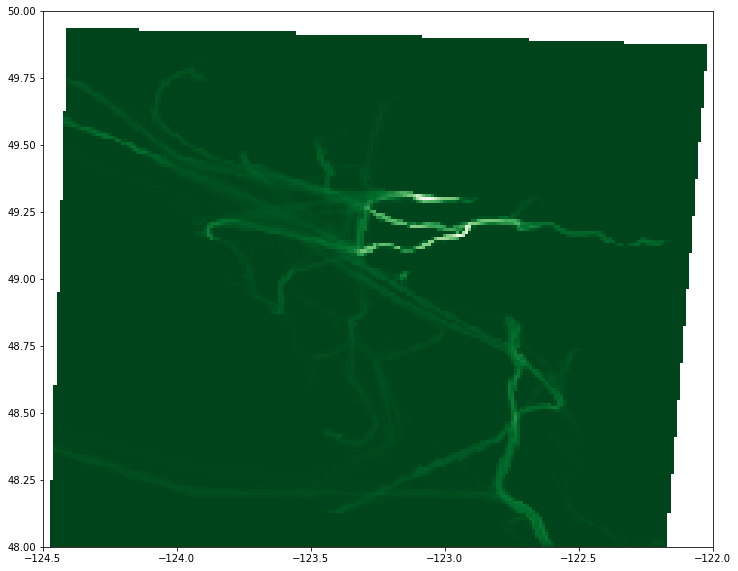

In [4]:
fig, ax = plt.subplots(figsize = (12,12))
show(Sep_data2, ax=ax, cmap = "Greens_r")
ax.set_xlim(-124.5, -122)
ax.set_ylim(48, 50)
#fig.savefig("/home/vdo/Pictures/tif_file.png", bbox_inches='tight');

In [5]:
list_of_candidates = np.array([])
probability_distribution = np.array([])
lats = np.array([])
lons = np.array([])

count = 0
for y in range(589):
    for x in range(270):
        x2, y2 = Sep_data2.transform * (x,y)
        list_of_candidates = np.append(list_of_candidates, count)
        lats = np.append(lats, x2)
        lons = np.append(lons, y2)
        probability_distribution = np.append(probability_distribution,
                                             data[x,y]/data.sum())
        count = count + 1
print(count)

159030


In [6]:
probability_distribution2 = probability_distribution/probability_distribution.sum()
probability_distribution2.sum()

1.0

In [7]:
a = choice(list_of_candidates ,p=probability_distribution2)
print(lats[int(a)])
print(lons[int(a)])

-125.96157549521197
46.61298061369801


In [8]:
a = choice(list_of_candidates ,p=probability_distribution2)
print(lats[int(a)])
print(lons[int(a)])

-126.16776710274058
44.98635793208348
